## Predicting the Survival of Titanic Passengers

### This notebook is going to be focused on solving the problem of predicting whether a passenger on the titanic would have been survived or not.




* Here, I will go through the whole process of creating a machine learning model on the famous "Titanic dataset" , which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival.



### History of RMS Titanic

* The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

### Content

* survival Survival : 0 = No, 1 = Yes
* pclass Ticket class : 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
* sex : M (Male), F (Female)
* Age : Age in years (Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5)
* sibsp : of siblings / spouses aboard the Titanic ( The dataset defines family relations in this way...)
* parch : of parents / children aboard the Titanic (The dataset defines family relations in this way...)
(Parent = mother, father Child=daughter, son, stepdaughter, stepson. Some children travelled only with a nanny,therefore parch=0 for them.)
* ticket : Ticket number
* fare : Passenger fare
* cabin : Cabin number
* embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampto

## Importing LIbraries and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Read the Data

In [2]:
Titanic_data = pd.read_csv("train.csv")

In [3]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Titanic_data.shape

(891, 12)

## Lets check the data type

In [5]:
Titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
Titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Let's check the summary fo data

In [7]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Total Unique Value

In [9]:
Titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Total Missing Values

In [10]:
total = Titanic_data.isnull().sum().sort_values(ascending=False)
percent = (Titanic_data.isnull().sum()/Titanic_data.isnull().count()*100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent(%)'])

missing_data

,Total,Percent(%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


* Cabin have 77 % missing value.
* Age have approx 20 % missing value.
* Embarked have only 2 missing value.

## Visualising Data

Text(0.5, 1.0, 'Count Plot of Sex')

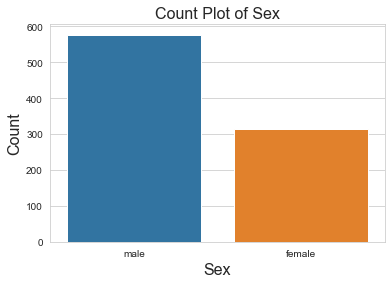

In [11]:
sns.set_style("whitegrid")
sns.countplot('Sex' ,data = Titanic_data)
plt.xlabel('Sex' , fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Count Plot of Sex', fontsize=16)

Text(0.5, 1.0, 'Count Plot of Survived')

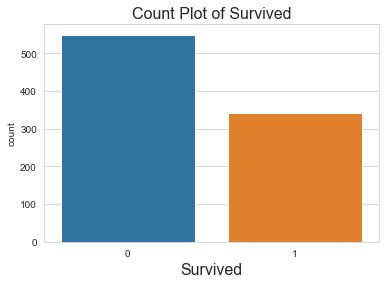

In [12]:
sns.set_style("whitegrid")
sns.countplot('Survived' ,data = Titanic_data)
plt.xlabel('Survived', fontsize=16)
plt.title('Count Plot of Survived', fontsize=16)

Text(0.5, 1.0, 'Plot of Sex and Survived')

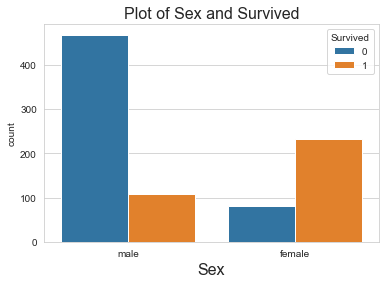

In [13]:
sns.set_style("whitegrid")
sns.countplot('Sex', hue = 'Survived' ,data = Titanic_data)
plt.xlabel('Sex', fontsize=16)
plt.title('Plot of Sex and Survived', fontsize=16)

* female survivor are more than male.
* male passenger lost thier lives in large number.

Text(0.5, 1.0, 'Plot of Survived and Pclass')

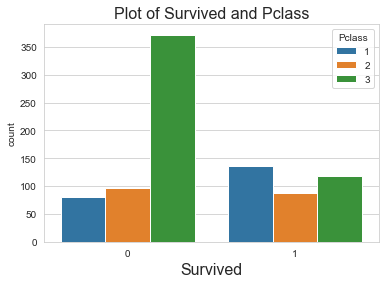

In [14]:
sns.set_style("whitegrid")
sns.countplot('Survived', hue = 'Pclass' ,data = Titanic_data)
plt.xlabel('Survived', fontsize=16)
plt.title('Plot of Survived and Pclass', fontsize=16)

* Passeneger in Pclass = 3 have lost more life.

Text(0.5, 1.0, 'Plot of SibSp and Survived')

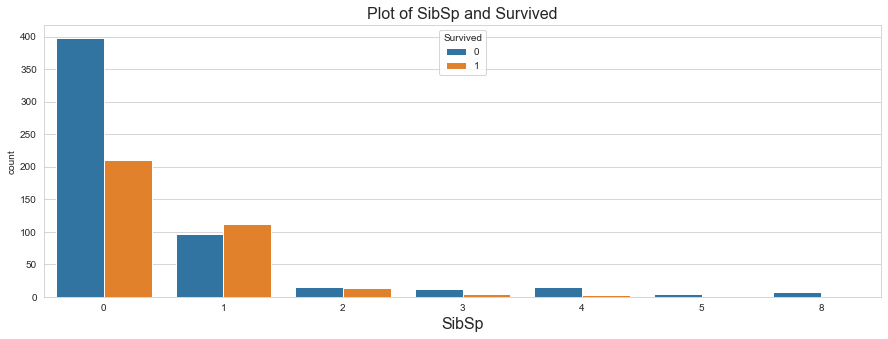

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot('SibSp', hue = 'Survived' ,data = Titanic_data)
plt.xlabel('SibSp', fontsize=16)
plt.title('Plot of SibSp and Survived', fontsize=16)

Text(0.5, 1.0, 'Plot of Parch and Survived')

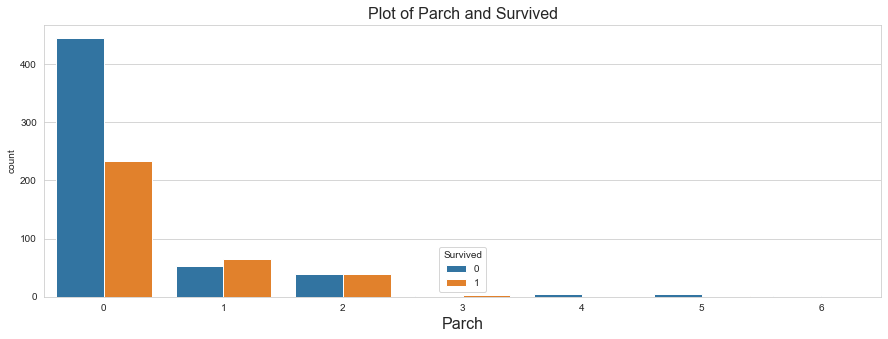

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot('Parch', hue = 'Survived' ,data = Titanic_data)
plt.xlabel('Parch', fontsize=16)
plt.title('Plot of Parch and Survived', fontsize=16)

Text(0.5, 1.0, 'Plot of Survived and Embarked')

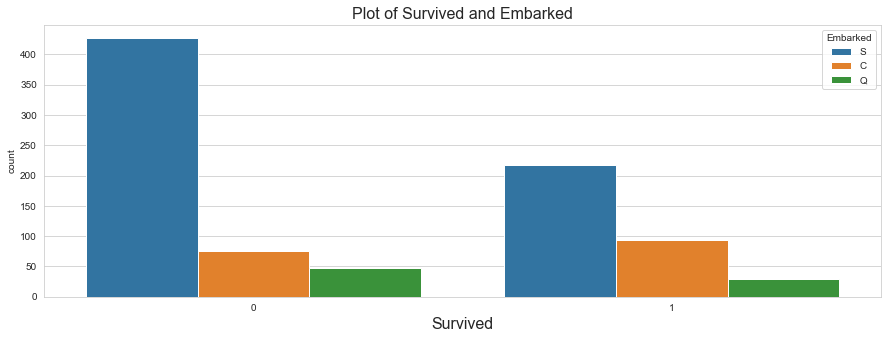

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot('Survived', hue = 'Embarked' ,data = Titanic_data)
plt.xlabel('Survived', fontsize=16)
plt.title('Plot of Survived and Embarked', fontsize=16)           

## Correlation Matrix

<AxesSubplot:>

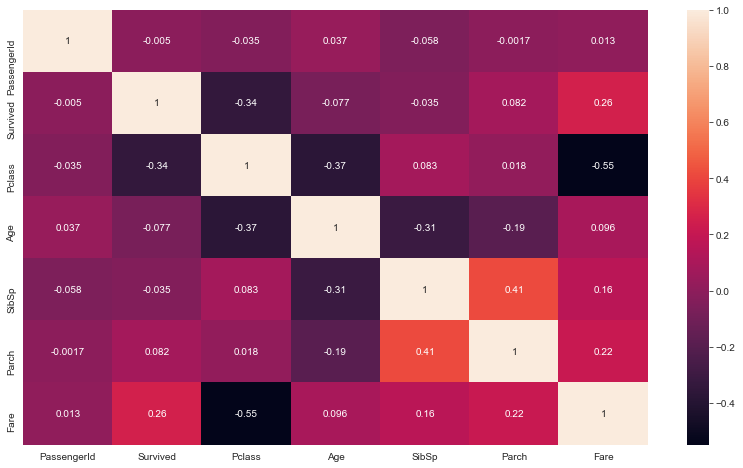

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(Titanic_data.corr(), annot=True)

## Handling Missing value

### 1. Embarked

In [19]:
Titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
Titanic_data['Embarked'].fillna('S', inplace = True)

### 2. Age

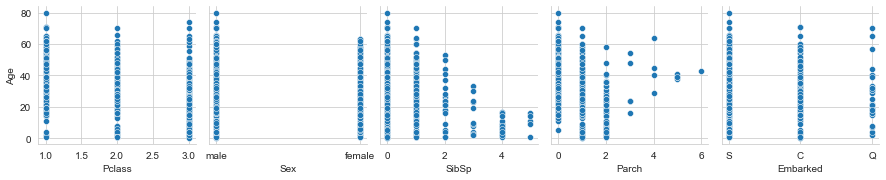

In [21]:
sns.pairplot(x_vars=['Pclass','Sex','SibSp','Parch','Embarked'], y_vars='Age',data = Titanic_data)

### Grouping the data "SibSp" and "Age" 

In [22]:
Titanic_data.groupby('SibSp')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
SibSp,,,,,,,,
0,471.0,31.397558,13.647767,0.42,22.00,29.0,39.00,80.0
1,183.0,30.089727,14.645033,0.67,20.00,30.0,39.00,70.0
2,25.0,22.620000,14.679230,0.75,16.00,23.0,28.00,53.0
3,12.0,13.916667,11.317391,2.00,3.75,9.5,23.25,33.0
4,18.0,7.055556,4.880601,1.00,3.25,6.5,9.00,17.0
5,5.0,10.200000,5.805170,1.00,9.00,11.0,14.00,16.0
8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualising Relation between "SibSp" and "Age null values"

Text(0.5, 1.0, 'Count Plot for SibSp where Age have null value')

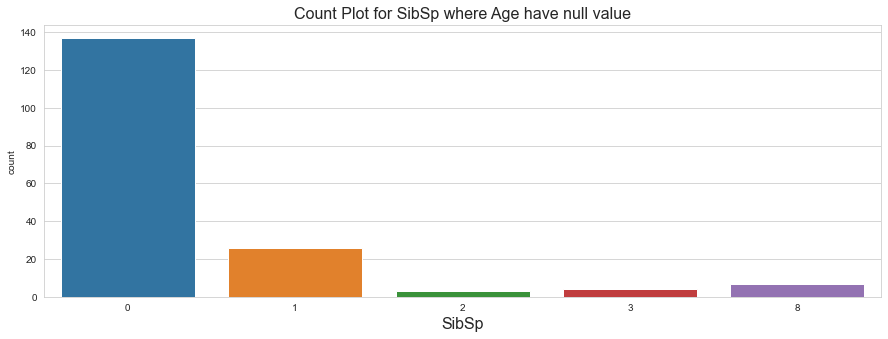

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
sns.countplot(x='SibSp',data = Titanic_data[Titanic_data['Age'].isnull()])
plt.xlabel('SibSp', fontsize=16)
plt.title('Count Plot for SibSp where Age have null value', fontsize=16)

In [24]:
Titanic_data['Age'].mean()

29.69911764705882

In [25]:
Titanic_data['Age'].median()

28.0

Text(0.5, 0, 'Age')

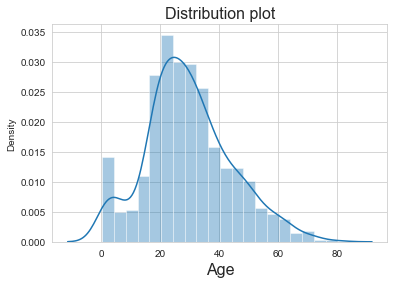

In [26]:
sns.set_style("whitegrid")
sns.distplot(Titanic_data['Age'])
plt.title('Distribution plot', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [27]:
Titanic_data['Age']=np.where((Titanic_data['SibSp']==8) & (Titanic_data['Age'].isnull()),28.0,Titanic_data['Age'])

Titanic_data['Age']=np.where((Titanic_data['SibSp']==3) & (Titanic_data['Age'].isnull()),9.5,Titanic_data['Age'])

Titanic_data['Age']=np.where((Titanic_data['SibSp']==2) & (Titanic_data['Age'].isnull()),23.0,Titanic_data['Age'])

Titanic_data['Age']=np.where((Titanic_data['SibSp']==1) & (Titanic_data['Age'].isnull()),30.0,Titanic_data['Age'])

Titanic_data['Age']=np.where((Titanic_data['SibSp']==0) & (Titanic_data['Age'].isnull()),29.0,Titanic_data['Age'])

### We remove some columns that we are not going to use for our model.

In [28]:
Titanic_data.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [29]:
Titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Handling Outliers

Text(0.5, 1.0, 'Boxplot for Age ')

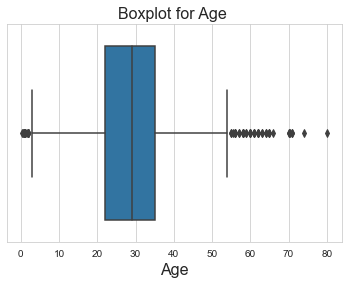

In [30]:
sns.set_style("whitegrid")
sns.boxplot(Titanic_data['Age'])
plt.xlabel('Age', fontsize=16)
plt.title('Boxplot for Age ', fontsize=16)

Text(0, 0.5, 'Survived')

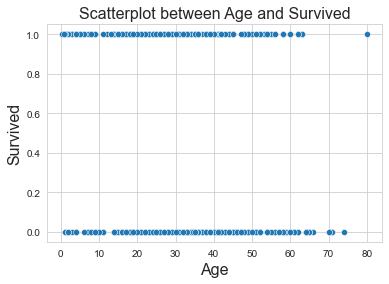

In [31]:
sns.set_style("whitegrid")
sns.scatterplot(x = 'Age', y = 'Survived', data=Titanic_data)
plt.title('Scatterplot between Age and Survived', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Survived', fontsize=16)

Text(0.5, 1.0, 'Boxplot for Fare ')

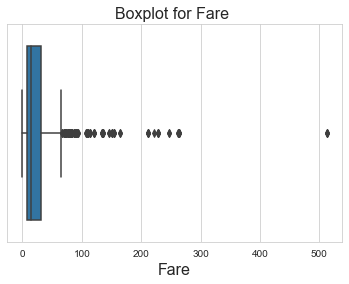

In [32]:
sns.set_style("whitegrid")
sns.boxplot(Titanic_data['Fare'])
plt.xlabel('Fare', fontsize=16)
plt.title('Boxplot for Fare ', fontsize=16)

Text(0, 0.5, 'Survived')

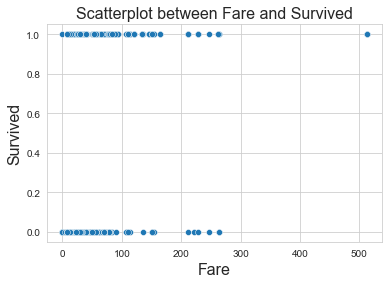

In [33]:
sns.set_style("whitegrid")
sns.scatterplot(x='Fare', y='Survived', data= Titanic_data)
plt.title('Scatterplot between Fare and Survived', fontsize=16)
plt.xlabel('Fare', fontsize=16)
plt.ylabel('Survived', fontsize=16)

In [34]:
Titanic_data[Titanic_data['Fare']>300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [35]:
Titanic_data.drop(Titanic_data[Titanic_data['Fare']>300].index, inplace = True)

Text(0, 0.5, 'Survived')

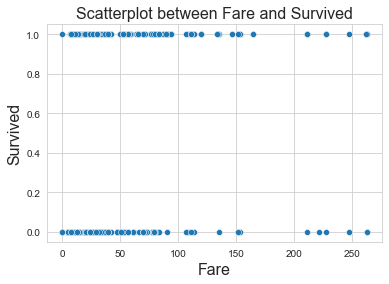

In [36]:
sns.set_style("whitegrid")
sns.scatterplot(x='Fare', y='Survived', data= Titanic_data)
plt.title('Scatterplot between Fare and Survived', fontsize=16)
plt.xlabel('Fare', fontsize=16)
plt.ylabel('Survived', fontsize=16)

## Separate the Numerical Columns

In [37]:
Numerical_cols = Titanic_data.select_dtypes(include = np.number)

Numerical_cols.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


## Separate the Categorical Columns

In [38]:
Categorical_cols = Titanic_data.select_dtypes(include = 'object').columns

Categorical_cols

Index(['Sex', 'Embarked'], dtype='object')

## Create Dummy Variable 

In [39]:
Titanic_data_dummies = pd.get_dummies(Titanic_data[Categorical_cols])

Titanic_data_dummies.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


## Combine the Numerical And Dummy Variable

In [40]:
Titanic_data_combined = pd.concat([Numerical_cols,Titanic_data_dummies],axis=1)

Titanic_data_combined.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [41]:
Titanic_data_combined.drop(columns=['Sex_male','Embarked_S'], inplace = True)

## Indetify the Independent and Dependent variable

In [42]:
X = Titanic_data_combined.drop(columns=['Survived'])

Y = Titanic_data_combined['Survived']

## Spliting Data into Train and Test

In [43]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [44]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q
486,1,35.0,1,0,90.0000,1,0,0
293,3,24.0,0,0,8.8500,1,0,0
172,3,1.0,1,1,11.1333,1,0,0
450,2,36.0,1,2,27.7500,0,0,0
361,2,29.0,1,0,27.7208,0,1,0
...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1,0,0
271,3,25.0,0,0,0.0000,0,0,0
863,3,28.0,8,2,69.5500,1,0,0
436,3,21.0,2,2,34.3750,1,0,0


## Performing Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

Classifier = LogisticRegression()

In [46]:
Classifier.fit(x_train,y_train)

LogisticRegression()

## Predictions

In [47]:
y_pred = Classifier.predict(x_test)

y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

## Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test,y_pred)

CM

array([[140,  20],
       [ 25,  82]], dtype=int64)

## Accuracy

In [49]:
from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(y_test,y_pred)

print('Accuracy is  :' ,Accuracy)

Accuracy is  : 0.8314606741573034


* Accuracy  =      83.14 %

## Precision Score

In [50]:
from sklearn.metrics import precision_score

precision = precision_score(y_test,y_pred)

print('Precision is  :',precision)

Precision is  : 0.803921568627451


* Precision =  80.39 %

## Recall Score

In [51]:
from sklearn.metrics import recall_score

recall = recall_score(y_test,y_pred)

print('Recall is  :',recall)

Recall is  : 0.7663551401869159


* Recall = 76.63 %

## F1 Score

In [52]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test,y_pred)

print('F1 score is :' ,f1)

F1 score is : 0.7846889952153109


* F1 score =  78.46 %

## Area Under Curve

In [53]:
from sklearn.metrics import roc_auc_score

Area_under_curve = roc_auc_score(y_test,y_pred)

print('Roc Auc is  :',Area_under_curve)

Roc Auc is  : 0.8206775700934579


* ROC Area Under Curve =  82.06 %

## Plotting ROC Curve 

In [54]:
from sklearn.metrics import roc_curve

FPR,TPR,Thresholds = roc_curve(y_test,Classifier.predict_proba(x_test)[:,1])

In [55]:
type(pd.Series(Thresholds))

fpr_series = pd.Series(FPR)
tpr_series = pd.Series(TPR)
thresholds_series = pd.Series(Thresholds)

df = pd.concat([fpr_series,tpr_series,thresholds_series],axis=1,keys=['FPR','TPR','THRESHOLD'])
df.sort_values(by='TPR',ascending=False)

,FPR,TPR,THRESHOLD
84,1.00000,1.000000,0.006449
83,0.95625,1.000000,0.056813
82,0.95625,0.990654,0.063066
81,0.89375,0.990654,0.080339
80,0.89375,0.971963,0.084135
...,...,...,...
4,0.01250,0.177570,0.921440
3,0.00625,0.177570,0.932218
2,0.00625,0.009346,0.962574
1,0.00000,0.009346,0.966222


Text(0.5, 1.0, 'Receiver operating characteristic (ROC) curve')

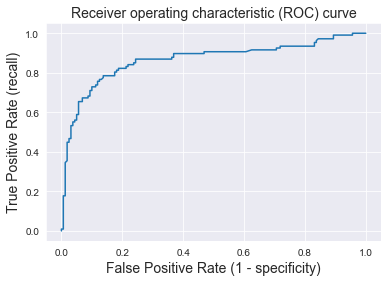

In [56]:
sns.set_style("darkgrid")
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve', fontsize=14)

In [57]:
# getting the probabilities of our predictions

y_scores = Classifier.predict_proba(x_train)
y_scores = y_scores[:,1]

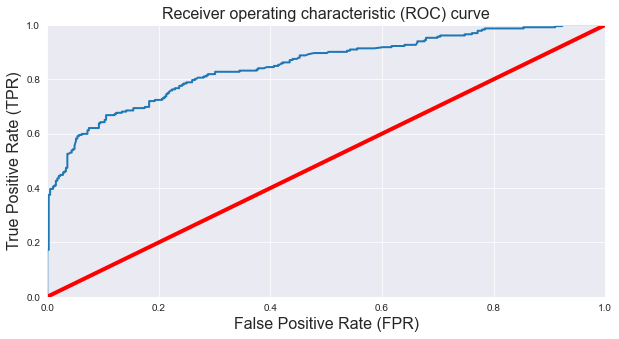

In [58]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.title('Receiver operating characteristic (ROC) curve' , fontsize=16)    

    
plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

* The red line in the middel represents a purely random classifier and therefore your classifier should be as far away from it as possible.

## Model evaluation

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Absoulte Error     :", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error :", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absoulte Error     : 0.16853932584269662
Root Mean Squared Error : 0.41053541362798


* Mean Absoulte Error =  0.16853932584269662



* Root Mean Squared Error = 0.41053541362798 